In [1]:
import os
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import cv2

#data path 수정
os.chdir("C:\\Users\\Owner2\\Desktop\\G팔로미_vuno")
os.getcwd()

'C:\\Users\\Owner2\\Desktop\\G팔로미_vuno'

In [2]:
X=np.load('data_X.npy')
y=np.load('data_y.npy')

In [3]:
#train, validation set 분리
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.3)

In [4]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    ##featurewise_center=True,
    #featurewise_std_normalization=True, 
    rotation_range=25.0,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True) #수평방향 뒤집기

datagen.fit(X_train)

dgf=datagen.flow(X_train,y_train,batch_size=64)

Using TensorFlow backend.


In [5]:
from keras import layers, models
from keras.applications import VGG16
from keras import Input
from keras.models import Model
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers, initializers, regularizers, metrics
from keras.callbacks import ModelCheckpoint
import os
from glob import glob
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
 


input_tensor = Input(shape=(224, 224, 3), dtype='float32', name='input')
 
x = layers.Conv2D(64, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal', kernel_regularizer=regularizers.l2(0.01))(input_tensor)
x = layers.Conv2D(64, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal', kernel_regularizer=regularizers.l2(0.01))(x)
x = layers.MaxPooling2D((2,2))(x)
 
x = layers.Conv2D(128, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal', kernel_regularizer=regularizers.l2(0.01))(x)
x = layers.Conv2D(128, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal', kernel_regularizer=regularizers.l2(0.01))(x)
x = layers.MaxPooling2D((2,2))(x)
 
x = layers.Conv2D(256, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal', kernel_regularizer=regularizers.l2(0.01))(x)
x = layers.Conv2D(256, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal', kernel_regularizer=regularizers.l2(0.01))(x)
x = layers.Conv2D(256, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal', kernel_regularizer=regularizers.l2(0.01))(x)
x = layers.MaxPooling2D((2,2))(x)
 
x = layers.Conv2D(512, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal', kernel_regularizer=regularizers.l2(0.01))(x)
x = layers.Conv2D(512, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal', kernel_regularizer=regularizers.l2(0.01))(x)
x = layers.Conv2D(512, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal', kernel_regularizer=regularizers.l2(0.01))(x)
x = layers.MaxPooling2D((2,2))(x)
 
x = layers.Conv2D(512, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal', kernel_regularizer=regularizers.l2(0.01))(x)
x = layers.Conv2D(512, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal', kernel_regularizer=regularizers.l2(0.01))(x)
x = layers.Conv2D(512, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal', kernel_regularizer=regularizers.l2(0.01))(x)
x = layers.MaxPooling2D((2,2))(x)
 
x = layers.Flatten()(x)
x = layers.Dense(4096, kernel_initializer='he_normal')(x)
x = layers.Dropout(0.3)(x)
x = layers.Dense(2048, kernel_initializer='he_normal')(x)
x = layers.Dense(1024, kernel_initializer='he_normal')(x)
x = layers.Dense(512, kernel_initializer='he_normal')(x)
x = layers.Dropout(0.3)(x)
x = layers.Dense(264, kernel_initializer='he_normal')(x)
output_tensor = layers.Dense(4, activation='softmax')(x)
 
myvgg = Model(input_tensor, output_tensor)
myvgg.summary()

W0605 16:16:14.542713 14160 deprecation_wrapper.py:119] From C:\Users\Owner2\Anaconda3\envs\keras2\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0605 16:16:14.563720 14160 deprecation_wrapper.py:119] From C:\Users\Owner2\Anaconda3\envs\keras2\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0605 16:16:14.565707 14160 deprecation_wrapper.py:119] From C:\Users\Owner2\Anaconda3\envs\keras2\lib\site-packages\keras\backend\tensorflow_backend.py:4185: The name tf.truncated_normal is deprecated. Please use tf.random.truncated_normal instead.

W0605 16:16:14.604732 14160 deprecation_wrapper.py:119] From C:\Users\Owner2\Anaconda3\envs\keras2\lib\site-packages\keras\backend\tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0605 16:16:14.8

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           (None, 224, 224, 3)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 224, 224, 64)      1792      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 112, 112, 128)     147584    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 56, 56, 128)       0         
__________

In [6]:
# checkpoint = ModelCheckpoint(filepath='My_VGG_{epoch:03d}_{val_loss:.7f}.hdf5',monitor='loss', mode='min', save_best_only=True)
checkpoint = ModelCheckpoint(filepath='My_VGG_weight_4.hdf5', 
            monitor='loss', 
            mode='min', 
            save_best_only=True)

In [7]:
from keras import backend as K
import tensorflow as tf

def auc(y_true, y_pred):
    auc = tf.metrics.auc(y_true, y_pred)[1]
    K.get_session().run(tf.local_variables_initializer())
    return auc

def recall(y_target, y_pred):
    # clip(t, clip_value_min, clip_value_max) : clip_value_min~clip_value_max 이외 가장자리를 깎아 낸다
    # round : 반올림한다
    y_target_yn = K.round(K.clip(y_target, 0, 1)) # 실제값을 0(Negative) 또는 1(Positive)로 설정한다
    y_pred_yn = K.round(K.clip(y_pred, 0, 1)) # 예측값을 0(Negative) 또는 1(Positive)로 설정한다

    # True Positive는 실제 값과 예측 값이 모두 1(Positive)인 경우이다
    count_true_positive = K.sum(y_target_yn * y_pred_yn) 

    # (True Positive + False Negative) = 실제 값이 1(Positive) 전체
    count_true_positive_false_negative = K.sum(y_target_yn)

    # Recall =  (True Positive) / (True Positive + False Negative)
    # K.epsilon()는 'divide by zero error' 예방차원에서 작은 수를 더한다
    recall = count_true_positive / (count_true_positive_false_negative + K.epsilon())

    # return a single tensor value
    return recall


def precision(y_target, y_pred):
    # clip(t, clip_value_min, clip_value_max) : clip_value_min~clip_value_max 이외 가장자리를 깎아 낸다
    # round : 반올림한다
    y_pred_yn = K.round(K.clip(y_pred, 0, 1)) # 예측값을 0(Negative) 또는 1(Positive)로 설정한다
    y_target_yn = K.round(K.clip(y_target, 0, 1)) # 실제값을 0(Negative) 또는 1(Positive)로 설정한다

    # True Positive는 실제 값과 예측 값이 모두 1(Positive)인 경우이다
    count_true_positive = K.sum(y_target_yn * y_pred_yn) 

    # (True Positive + False Positive) = 예측 값이 1(Positive) 전체
    count_true_positive_false_positive = K.sum(y_pred_yn)

    # Precision = (True Positive) / (True Positive + False Positive)
    # K.epsilon()는 'divide by zero error' 예방차원에서 작은 수를 더한다
    precision = count_true_positive / (count_true_positive_false_positive + K.epsilon())

    # return a single tensor value
    return precision


def f1score(y_target, y_pred):
    _recall = recall(y_target, y_pred)
    _precision = precision(y_target, y_pred)
    # K.epsilon()는 'divide by zero error' 예방차원에서 작은 수를 더한다
    _f1score = ( 2 * _recall * _precision) / (_recall + _precision+ K.epsilon())
    
    # return a single tensor value
    return _f1score

In [8]:
myvgg.compile(loss='categorical_crossentropy', 
              optimizer=optimizers.RMSprop(lr=1e-5),
              metrics=['accuracy', auc, precision, recall, f1score])

W0605 16:16:14.948417 14160 deprecation_wrapper.py:119] From C:\Users\Owner2\Anaconda3\envs\keras2\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0605 16:16:15.045547 14160 deprecation.py:323] From C:\Users\Owner2\Anaconda3\envs\keras2\lib\site-packages\tensorflow\python\ops\metrics_impl.py:809: div (from tensorflow.python.ops.math_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.


In [9]:
X.shape

(2861, 224, 224, 3)

In [10]:
# history1=myvgg.fit(X,y,batch_size=32,
#                   epochs=100,
#                   validation_split=0.3,
#                   callbacks=[checkpoint])

In [11]:
history = myvgg.fit_generator(dgf, 
            steps_per_epoch=50, 
            epochs=300, 
            validation_data=(X_val,y_val), 
            validation_steps=16, 
            callbacks=[checkpoint])

W0605 16:16:25.036355 14160 deprecation.py:323] From C:\Users\Owner2\Anaconda3\envs\keras2\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/300
50/50 [==============================] - 38s 763ms/step - loss: 95.0592 - acc: 0.2762 - auc: 0.4999 - precision: 0.2762 - recall: 0.2762 - f1score: 0.2762 - val_loss: 93.0955 - val_acc: 0.3539 - val_auc: 0.5246 - val_precision: 0.3539 - val_recall: 0.3539 - val_f1score: 0.3539
Epoch 2/300
50/50 [==============================] - 27s 538ms/step - loss: 91.9844 - acc: 0.3571 - auc: 0.5395 - precision: 0.3571 - recall: 0.3571 - f1score: 0.3571 - val_loss: 91.1154 - val_acc: 0.3539 - val_auc: 0.5476 - val_precision: 0.3539 - val_recall: 0.3539 - val_f1score: 0.3539
Epoch 3/300
50/50 [==============================] - 28s 552ms/step - loss: 88.2169 - acc: 0.3298 - auc: 0.5499 - precision: 0.3335 - recall: 0.3063 - f1score: 0.3163 - val_loss: 80.1107 - val_acc: 0.5320 - val_auc: 0.5512 - val_precision: 0.5849 - val_recall: 0.3655 - val_f1score: 0.4486
Epoch 4/300
50/50 [==============================] - 27s 545ms/step - loss: 79.7345 - acc: 0.4387 - auc: 0.5582 - precision: 0.482

50/50 [==============================] - 27s 544ms/step - loss: 48.5139 - acc: 0.5888 - auc: 0.8023 - precision: 0.6240 - recall: 0.5066 - f1score: 0.5584 - val_loss: 48.2498 - val_acc: 0.5576 - val_auc: 0.8035 - val_precision: 0.6006 - val_recall: 0.5134 - val_f1score: 0.5533
Epoch 30/300
50/50 [==============================] - 28s 551ms/step - loss: 47.5399 - acc: 0.6010 - auc: 0.8046 - precision: 0.6349 - recall: 0.5347 - f1score: 0.5802 - val_loss: 47.1071 - val_acc: 0.5891 - val_auc: 0.8060 - val_precision: 0.6184 - val_recall: 0.5541 - val_f1score: 0.5843
Epoch 31/300
50/50 [==============================] - 27s 544ms/step - loss: 46.5963 - acc: 0.5885 - auc: 0.8071 - precision: 0.6192 - recall: 0.5117 - f1score: 0.5599 - val_loss: 46.0808 - val_acc: 0.6112 - val_auc: 0.8084 - val_precision: 0.6426 - val_recall: 0.5646 - val_f1score: 0.6009
Epoch 32/300
50/50 [==============================] - 28s 555ms/step - loss: 45.6698 - acc: 0.5913 - auc: 0.8095 - precision: 0.6242 - recal

50/50 [==============================] - 27s 535ms/step - loss: 29.0274 - acc: 0.6040 - auc: 0.8442 - precision: 0.6248 - recall: 0.5621 - f1score: 0.5914 - val_loss: 28.7583 - val_acc: 0.6135 - val_auc: 0.8446 - val_precision: 0.6347 - val_recall: 0.5739 - val_f1score: 0.6027
Epoch 58/300
50/50 [==============================] - 27s 544ms/step - loss: 28.5427 - acc: 0.6044 - auc: 0.8451 - precision: 0.6221 - recall: 0.5597 - f1score: 0.5890 - val_loss: 28.2694 - val_acc: 0.6135 - val_auc: 0.8455 - val_precision: 0.6327 - val_recall: 0.5844 - val_f1score: 0.6075
Epoch 59/300
50/50 [==============================] - 27s 536ms/step - loss: 28.0655 - acc: 0.6127 - auc: 0.8460 - precision: 0.6340 - recall: 0.5793 - f1score: 0.6051 - val_loss: 27.8222 - val_acc: 0.6193 - val_auc: 0.8464 - val_precision: 0.6372 - val_recall: 0.5867 - val_f1score: 0.6107
Epoch 60/300
50/50 [==============================] - 27s 541ms/step - loss: 27.6310 - acc: 0.6061 - auc: 0.8468 - precision: 0.6308 - recal

50/50 [==============================] - 27s 544ms/step - loss: 19.5211 - acc: 0.6421 - auc: 0.8619 - precision: 0.6556 - recall: 0.6116 - f1score: 0.6326 - val_loss: 19.3796 - val_acc: 0.6217 - val_auc: 0.8622 - val_precision: 0.6300 - val_recall: 0.5960 - val_f1score: 0.6124
Epoch 86/300
50/50 [==============================] - 27s 538ms/step - loss: 19.3187 - acc: 0.6284 - auc: 0.8624 - precision: 0.6366 - recall: 0.5954 - f1score: 0.6151 - val_loss: 19.2367 - val_acc: 0.6193 - val_auc: 0.8626 - val_precision: 0.6412 - val_recall: 0.5984 - val_f1score: 0.6189
Epoch 87/300
50/50 [==============================] - 27s 546ms/step - loss: 19.0927 - acc: 0.6349 - auc: 0.8629 - precision: 0.6431 - recall: 0.6071 - f1score: 0.6244 - val_loss: 19.1427 - val_acc: 0.5809 - val_auc: 0.8631 - val_precision: 0.6089 - val_recall: 0.5623 - val_f1score: 0.5846
Epoch 88/300
50/50 [==============================] - 27s 539ms/step - loss: 18.8694 - acc: 0.6345 - auc: 0.8632 - precision: 0.6444 - recal

50/50 [==============================] - 27s 533ms/step - loss: 14.7018 - acc: 0.6510 - auc: 0.8721 - precision: 0.6579 - recall: 0.6269 - f1score: 0.6419 - val_loss: 14.6504 - val_acc: 0.6298 - val_auc: 0.8722 - val_precision: 0.6382 - val_recall: 0.6100 - val_f1score: 0.6237
Epoch 114/300
50/50 [==============================] - 27s 537ms/step - loss: 14.5860 - acc: 0.6476 - auc: 0.8724 - precision: 0.6590 - recall: 0.6271 - f1score: 0.6426 - val_loss: 14.5285 - val_acc: 0.6380 - val_auc: 0.8725 - val_precision: 0.6529 - val_recall: 0.6170 - val_f1score: 0.6343
Epoch 115/300
50/50 [==============================] - 27s 544ms/step - loss: 14.4428 - acc: 0.6549 - auc: 0.8727 - precision: 0.6637 - recall: 0.6371 - f1score: 0.6500 - val_loss: 14.4595 - val_acc: 0.6286 - val_auc: 0.8728 - val_precision: 0.6496 - val_recall: 0.6077 - val_f1score: 0.6278
Epoch 116/300
50/50 [==============================] - 27s 537ms/step - loss: 14.3151 - acc: 0.6501 - auc: 0.8729 - precision: 0.6625 - re

50/50 [==============================] - 27s 539ms/step - loss: 11.8790 - acc: 0.6651 - auc: 0.8789 - precision: 0.6737 - recall: 0.6485 - f1score: 0.6608 - val_loss: 11.8465 - val_acc: 0.6449 - val_auc: 0.8790 - val_precision: 0.6504 - val_recall: 0.6391 - val_f1score: 0.6447
Epoch 142/300
50/50 [==============================] - 28s 552ms/step - loss: 11.8047 - acc: 0.6561 - auc: 0.8791 - precision: 0.6668 - recall: 0.6394 - f1score: 0.6527 - val_loss: 11.7945 - val_acc: 0.6403 - val_auc: 0.8793 - val_precision: 0.6388 - val_recall: 0.6240 - val_f1score: 0.6312
Epoch 143/300
50/50 [==============================] - 27s 536ms/step - loss: 11.7471 - acc: 0.6653 - auc: 0.8794 - precision: 0.6724 - recall: 0.6454 - f1score: 0.6585 - val_loss: 11.8416 - val_acc: 0.5949 - val_auc: 0.8795 - val_precision: 0.6189 - val_recall: 0.5914 - val_f1score: 0.6047
Epoch 144/300
50/50 [==============================] - 27s 549ms/step - loss: 11.6576 - acc: 0.6617 - auc: 0.8796 - precision: 0.6722 - re

50/50 [==============================] - 27s 536ms/step - loss: 10.0873 - acc: 0.6720 - auc: 0.8843 - precision: 0.6762 - recall: 0.6563 - f1score: 0.6660 - val_loss: 10.0941 - val_acc: 0.6217 - val_auc: 0.8844 - val_precision: 0.6259 - val_recall: 0.6065 - val_f1score: 0.6160
Epoch 170/300
50/50 [==============================] - 27s 547ms/step - loss: 10.0315 - acc: 0.6771 - auc: 0.8845 - precision: 0.6834 - recall: 0.6605 - f1score: 0.6716 - val_loss: 10.0968 - val_acc: 0.5984 - val_auc: 0.8845 - val_precision: 0.6091 - val_recall: 0.5774 - val_f1score: 0.5927
Epoch 171/300
50/50 [==============================] - 27s 537ms/step - loss: 9.9827 - acc: 0.6806 - auc: 0.8846 - precision: 0.6876 - recall: 0.6676 - f1score: 0.6774 - val_loss: 10.1334 - val_acc: 0.6100 - val_auc: 0.8847 - val_precision: 0.6230 - val_recall: 0.5867 - val_f1score: 0.6041
Epoch 172/300
50/50 [==============================] - 27s 546ms/step - loss: 9.9341 - acc: 0.6677 - auc: 0.8848 - precision: 0.6741 - reca

50/50 [==============================] - 27s 545ms/step - loss: 8.8447 - acc: 0.6924 - auc: 0.8887 - precision: 0.6983 - recall: 0.6830 - f1score: 0.6905 - val_loss: 8.9295 - val_acc: 0.6205 - val_auc: 0.8888 - val_precision: 0.6277 - val_recall: 0.6112 - val_f1score: 0.6193
Epoch 198/300
50/50 [==============================] - 27s 539ms/step - loss: 8.8159 - acc: 0.6842 - auc: 0.8888 - precision: 0.6893 - recall: 0.6732 - f1score: 0.6811 - val_loss: 8.9186 - val_acc: 0.5984 - val_auc: 0.8889 - val_precision: 0.6086 - val_recall: 0.5925 - val_f1score: 0.6004
Epoch 199/300
50/50 [==============================] - 27s 547ms/step - loss: 8.7728 - acc: 0.6722 - auc: 0.8890 - precision: 0.6788 - recall: 0.6622 - f1score: 0.6703 - val_loss: 8.9062 - val_acc: 0.5995 - val_auc: 0.8890 - val_precision: 0.6161 - val_recall: 0.5832 - val_f1score: 0.5992
Epoch 200/300
50/50 [==============================] - 27s 539ms/step - loss: 8.7305 - acc: 0.6818 - auc: 0.8891 - precision: 0.6874 - recall: 0

50/50 [==============================] - 27s 536ms/step - loss: 7.9412 - acc: 0.6972 - auc: 0.8924 - precision: 0.7083 - recall: 0.6866 - f1score: 0.6972 - val_loss: 8.0830 - val_acc: 0.6065 - val_auc: 0.8925 - val_precision: 0.6206 - val_recall: 0.5937 - val_f1score: 0.6068
Epoch 226/300
50/50 [==============================] - 27s 538ms/step - loss: 7.9090 - acc: 0.6987 - auc: 0.8926 - precision: 0.7031 - recall: 0.6893 - f1score: 0.6961 - val_loss: 8.1158 - val_acc: 0.5902 - val_auc: 0.8926 - val_precision: 0.5976 - val_recall: 0.5809 - val_f1score: 0.5890
Epoch 227/300
50/50 [==============================] - 27s 546ms/step - loss: 7.8888 - acc: 0.6957 - auc: 0.8927 - precision: 0.7014 - recall: 0.6871 - f1score: 0.6941 - val_loss: 8.0483 - val_acc: 0.6170 - val_auc: 0.8927 - val_precision: 0.6289 - val_recall: 0.6077 - val_f1score: 0.6181
Epoch 228/300
50/50 [==============================] - 27s 539ms/step - loss: 7.8606 - acc: 0.6950 - auc: 0.8928 - precision: 0.7001 - recall: 0

50/50 [==============================] - 27s 537ms/step - loss: 7.2547 - acc: 0.6973 - auc: 0.8958 - precision: 0.7029 - recall: 0.6889 - f1score: 0.6957 - val_loss: 7.4137 - val_acc: 0.6100 - val_auc: 0.8959 - val_precision: 0.6219 - val_recall: 0.6065 - val_f1score: 0.6140
Epoch 254/300
50/50 [==============================] - 27s 545ms/step - loss: 7.2245 - acc: 0.7055 - auc: 0.8959 - precision: 0.7114 - recall: 0.6965 - f1score: 0.7038 - val_loss: 7.3600 - val_acc: 0.6310 - val_auc: 0.8960 - val_precision: 0.6380 - val_recall: 0.6193 - val_f1score: 0.6285
Epoch 255/300
50/50 [==============================] - 27s 537ms/step - loss: 7.1934 - acc: 0.7076 - auc: 0.8960 - precision: 0.7146 - recall: 0.6993 - f1score: 0.7068 - val_loss: 7.3825 - val_acc: 0.6123 - val_auc: 0.8961 - val_precision: 0.6175 - val_recall: 0.6030 - val_f1score: 0.6101
Epoch 256/300
50/50 [==============================] - 27s 549ms/step - loss: 7.1766 - acc: 0.7173 - auc: 0.8961 - precision: 0.7228 - recall: 0

50/50 [==============================] - 27s 537ms/step - loss: 6.7036 - acc: 0.7236 - auc: 0.8990 - precision: 0.7259 - recall: 0.7137 - f1score: 0.7197 - val_loss: 6.8784 - val_acc: 0.6182 - val_auc: 0.8991 - val_precision: 0.6263 - val_recall: 0.6100 - val_f1score: 0.6180
Epoch 282/300
50/50 [==============================] - 27s 541ms/step - loss: 6.6887 - acc: 0.7219 - auc: 0.8991 - precision: 0.7275 - recall: 0.7151 - f1score: 0.7212 - val_loss: 6.8482 - val_acc: 0.6345 - val_auc: 0.8992 - val_precision: 0.6453 - val_recall: 0.6263 - val_f1score: 0.6356
Epoch 283/300
50/50 [==============================] - 27s 537ms/step - loss: 6.6688 - acc: 0.7292 - auc: 0.8993 - precision: 0.7342 - recall: 0.7245 - f1score: 0.7293 - val_loss: 6.8610 - val_acc: 0.6310 - val_auc: 0.8993 - val_precision: 0.6406 - val_recall: 0.6228 - val_f1score: 0.6315
Epoch 284/300
50/50 [==============================] - 27s 543ms/step - loss: 6.6610 - acc: 0.7234 - auc: 0.8994 - precision: 0.7266 - recall: 0

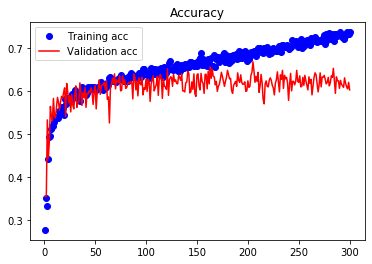

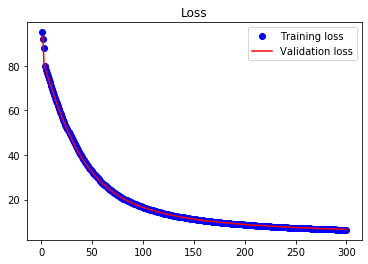

In [12]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
 
epochs = range(1, len(acc) + 1)
 
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Accuracy')
plt.legend()
plt.figure()
 
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Loss')
plt.legend()
 
plt.show()

In [13]:
myvgg.save('VGG16_Aug_1.h5')

In [17]:
X_test=np.load('X_test.npy')
y_test=np.load('y_test.npy')

In [18]:
_loss, _acc, _auc, _precision, _recall, _f1score = myvgg.evaluate(X_test, y_test, batch_size=64)
print('loss: {:.3f}, accuracy: {:.3f}, auc: {:.3f}, precision: {:.3f}, recall: {:.3f}, f1score: {:.3f}'.format(_loss, _acc, _auc, _precision, _recall, _f1score))

704/704 [==============================] - 2s 3ms/step
loss: 17.907, accuracy: 0.253, auc: 0.901, precision: 0.253, recall: 0.253, f1score: 0.253


In [19]:
_loss, _acc, _auc, _precision, _recall, _f1score = myvgg.evaluate(X_val, y_val, batch_size=64)
print('loss: {:.3f}, accuracy: {:.3f}, auc: {:.3f}, precision: {:.3f}, recall: {:.3f}, f1score: {:.3f}'.format(_loss, _acc, _auc, _precision, _recall, _f1score))

859/859 [==============================] - 2s 3ms/step
loss: 6.669, accuracy: 0.602, auc: 0.900, precision: 0.613, recall: 0.590, f1score: 0.601
